In [79]:
import numpy as np
import matplotlib.pyplot as plt

# DUSTYBOX_multi

In [80]:
vCOM = np.array([1.16666666666667, 1.16666666666667, 0.63963963963963])
lambda_1 = np.array([ -0.63397459621556, -141.742430504416, -0.52370200744224])
lambda_2 = np.array([ -2.36602540378444, -1058.25756949558, -105.976297992557])
cg_1 = np.array([ -0.22767090063074, -0.35610569612832, -0.06458203330249])
cg_2 = np.array([ 0.06100423396407, 0.18943902946166, 0.42494239366285])
cd_1_1 = np.array([ 0.84967936855889, 0.85310244713865, 1.36237475791577])
cd_1_2 = np.array([ -0.01634603522555, -0.01976911380532, -0.00201439755542])
cd_2_1 = np.array([ -0.62200846792815, -0.49699675101033, -0.13559165545855])
cd_2_2 = np.array([ -0.04465819873852, -0.16966991565634, -0.00404798418109])

Text(0.5, 1.0, 'DUSTYBOX - A')

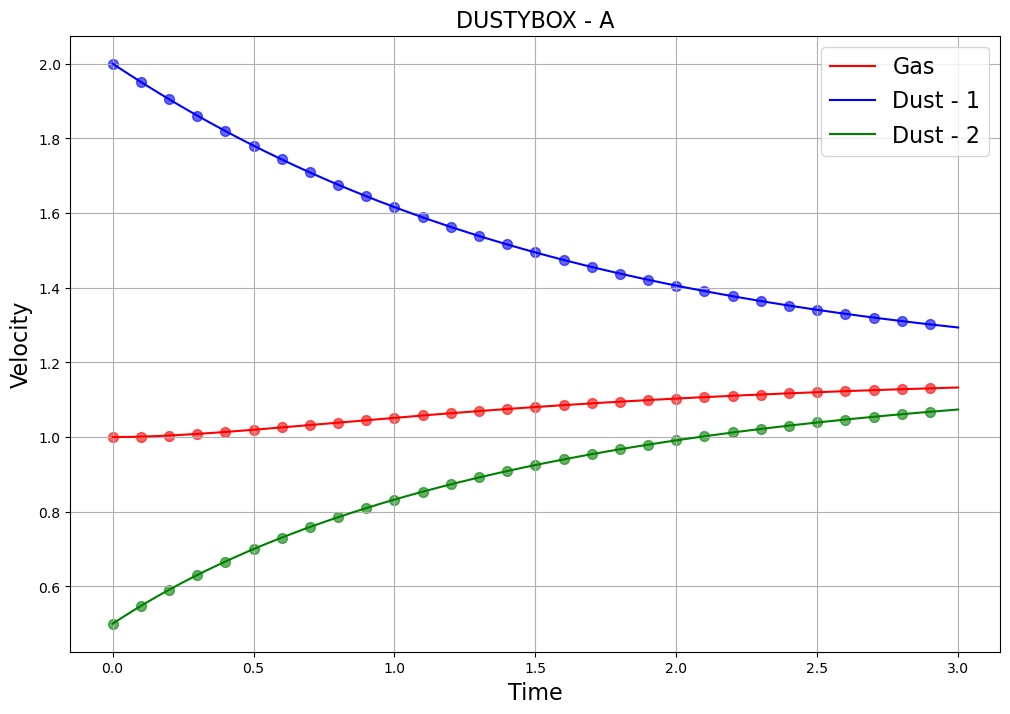

In [92]:
plt.figure(figsize=(12,8))
for i in range(0,30):
    data = np.loadtxt("DUSTYBOX/output_A/DHD/%d.txt"%i)
    plt.scatter(i/10, np.mean(data[:,1]), color='red', marker='o', alpha=0.6, s=50)
    plt.scatter(i/10, np.mean(data[:,4]), color='blue', marker='o', alpha=0.6, s=50)
    plt.scatter(i/10, np.mean(data[:,6]), color='green', marker='o', alpha=0.6, s=50)

plt.grid()


t = np.linspace(0,3,1000)
itest = 0
v_g = vCOM[itest] + cg_1[itest] * np.exp(lambda_1[itest]*t) + cg_2[itest]*np.exp(lambda_2[itest]*t)
v_d_1 = vCOM[itest] + cd_1_1[itest] * np.exp(lambda_1[itest]*t) + cd_1_2[itest]*np.exp(lambda_2[itest]*t)
v_d_2 = vCOM[itest] + cd_2_1[itest] * np.exp(lambda_1[itest]*t) + cd_2_2[itest]*np.exp(lambda_2[itest]*t)

plt.plot(t, v_g, color='red', label='Gas')
plt.plot(t, v_d_1, color='blue', label='Dust - 1')
plt.plot(t, v_d_2, color='green', label='Dust - 2')
plt.legend(fontsize=16)
plt.ylabel("Velocity", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.title("DUSTYBOX - A", fontsize=16)

Text(0.5, 1.0, 'DUSTYBOX - B')

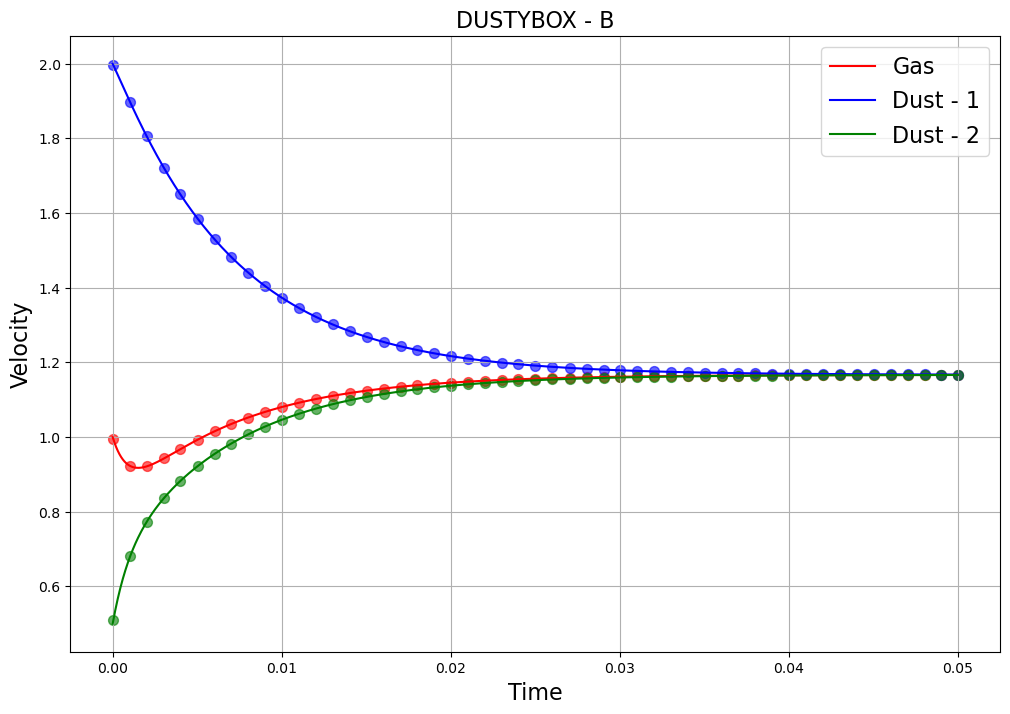

In [89]:
plt.figure(figsize=(12,8))
for i in range(0,51):
    data = np.loadtxt("DUSTYBOX/output_B/DHD/%d.txt"%i)
    plt.scatter(data[0,-1], np.mean(data[:,1]), color='red', marker='o', alpha=0.6, s=50)
    plt.scatter(data[0,-1], np.mean(data[:,4]), color='blue', marker='o', alpha=0.6, s=50)
    plt.scatter(data[0,-1], np.mean(data[:,6]), color='green', marker='o', alpha=0.6, s=50)

plt.grid()


t = np.linspace(0,0.05,1000)
itest = 1
v_g = vCOM[itest] + cg_1[itest] * np.exp(lambda_1[itest]*t) + cg_2[itest]*np.exp(lambda_2[itest]*t)
v_d_1 = vCOM[itest] + cd_1_1[itest] * np.exp(lambda_1[itest]*t) + cd_1_2[itest]*np.exp(lambda_2[itest]*t)
v_d_2 = vCOM[itest] + cd_2_1[itest] * np.exp(lambda_1[itest]*t) + cd_2_2[itest]*np.exp(lambda_2[itest]*t)

plt.plot(t, v_g, color='red', label='Gas')
plt.plot(t, v_d_1, color='blue', label='Dust - 1')
plt.plot(t, v_d_2, color='green', label='Dust - 2')
plt.legend(fontsize=16)
plt.ylabel("Velocity", fontsize=16)
plt.xlabel("Time", fontsize=16)

plt.title("DUSTYBOX - B", fontsize=16)
#plt.savefig("DUSTYBOX_multi_B.png", dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'DUSTYBOX - C')

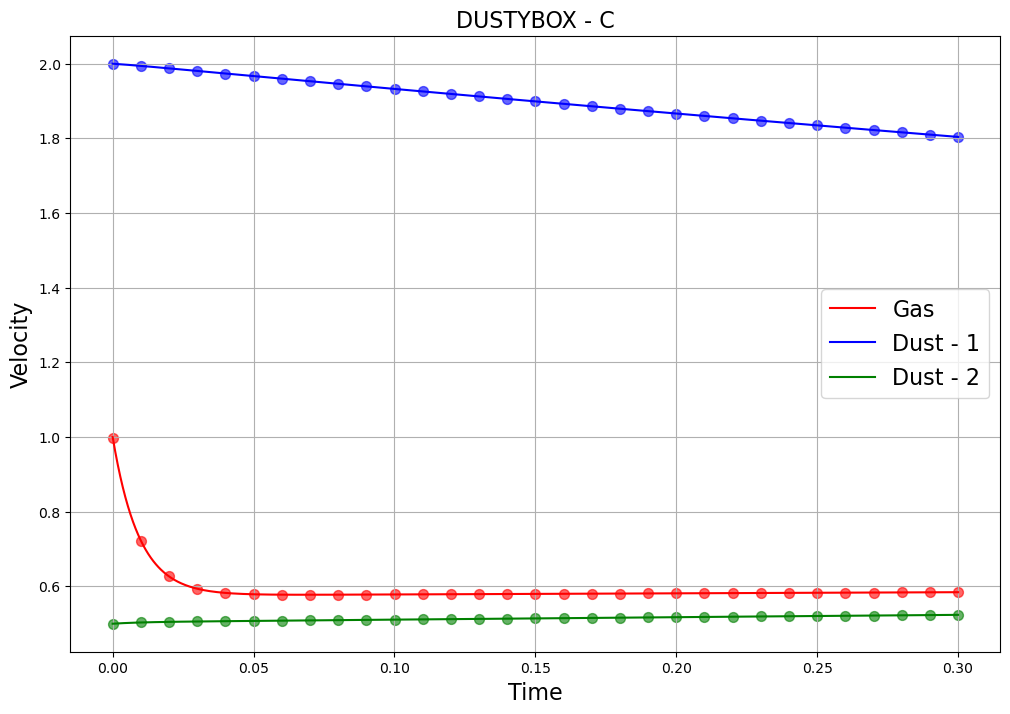

In [90]:
plt.figure(figsize=(12,8))
for i in range(0,31):
    data = np.loadtxt("DUSTYBOX/output_C/DHD/%d.txt"%i)
    plt.scatter(data[0,-1], np.mean(data[:,1]), color='red', marker='o', alpha=0.6, s=50)
    plt.scatter(data[0,-1], np.mean(data[:,4]), color='blue', marker='o', alpha=0.6, s=50)
    plt.scatter(data[0,-1], np.mean(data[:,6]), color='green', marker='o', alpha=0.6, s=50)

plt.grid()


t = np.linspace(0,0.3,1000)
itest = 2
v_g = vCOM[itest] + cg_1[itest] * np.exp(lambda_1[itest]*t) + cg_2[itest]*np.exp(lambda_2[itest]*t)
v_d_1 = vCOM[itest] + cd_1_1[itest] * np.exp(lambda_1[itest]*t) + cd_1_2[itest]*np.exp(lambda_2[itest]*t)
v_d_2 = vCOM[itest] + cd_2_1[itest] * np.exp(lambda_1[itest]*t) + cd_2_2[itest]*np.exp(lambda_2[itest]*t)

plt.plot(t, v_g, color='red', label='Gas')
plt.plot(t, v_d_1, color='blue', label='Dust - 1')
plt.plot(t, v_d_2, color='green', label='Dust - 2')
plt.legend(fontsize=16)
plt.ylabel("Velocity", fontsize=16)
plt.xlabel("Time", fontsize=16)

plt.title("DUSTYBOX - C", fontsize=16)
#plt.savefig("DUSTYBOX_multi_C.png", dpi=600, bbox_inches='tight')

# DUSTYWAVE_multi

In [93]:
from scipy.optimize import curve_fit
def wave(x, f0, df_real, df_im):
    return f0 + 1e-4 * (df_real * np.cos(2*np.pi*x) - df_im * np.sin(2*np.pi*x))


def fit_wave(data):
    x = np.linspace(0,1,data.shape[0])
    popt, _ = curve_fit(wave, x, data, maxfev = int(1e5))
    return popt[1] / popt[0]

def fit_wave_vel(data):
    x = np.linspace(0,1,data.shape[0])
    popt, _ = curve_fit(wave, x, data, maxfev = int(1e5))
    return popt[1]


Text(0.5, 1.0, 'DUSTYWAVE')

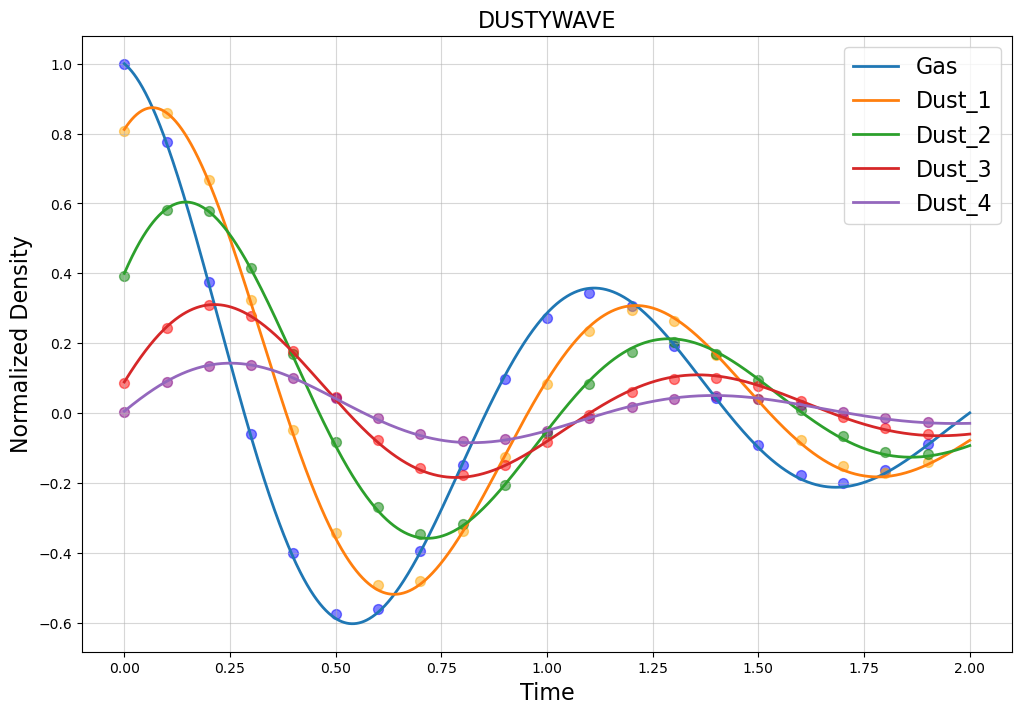

In [100]:
plt.figure(figsize=(12,8))
data = np.loadtxt("DUSTYWAVE/analytic_wave_damping.txt")
plt.plot(data[:,0], data[:,1], label='Gas', lw=2)
plt.plot(data[:,0],data[:,2], label = 'Dust_1', lw=2)
plt.plot(data[:,0],data[:,3], label = 'Dust_2', lw=2)
plt.plot(data[:,0],data[:,4], label = 'Dust_3', lw=2)
plt.plot(data[:,0],data[:,5], label = 'Dust_4', lw=2)

for i in range(0,20):
    data = np.loadtxt("DUSTYWAVE/output_B/DHD/%d.txt"%i)
    plt.scatter(data[0,-1], fit_wave(data[:,0]), color='blue', alpha=0.5, s=50)
    plt.scatter(data[0,-1], fit_wave(data[:,3]), color='orange', alpha=0.5, s=50)
    plt.scatter(data[0,-1], fit_wave(data[:,5]), color='green', alpha=0.5, s=50)
    plt.scatter(data[0,-1], fit_wave(data[:,7]), color='red', alpha=0.5, s=50)
    plt.scatter(data[0,-1], fit_wave(data[:,9]), color='purple', alpha=0.5, s=50)

plt.legend(fontsize=16)
plt.ylabel("Normalized Density", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.grid(alpha=0.5)

plt.title("DUSTYWAVE", fontsize=16)

# DUSTYSHOCK_multi

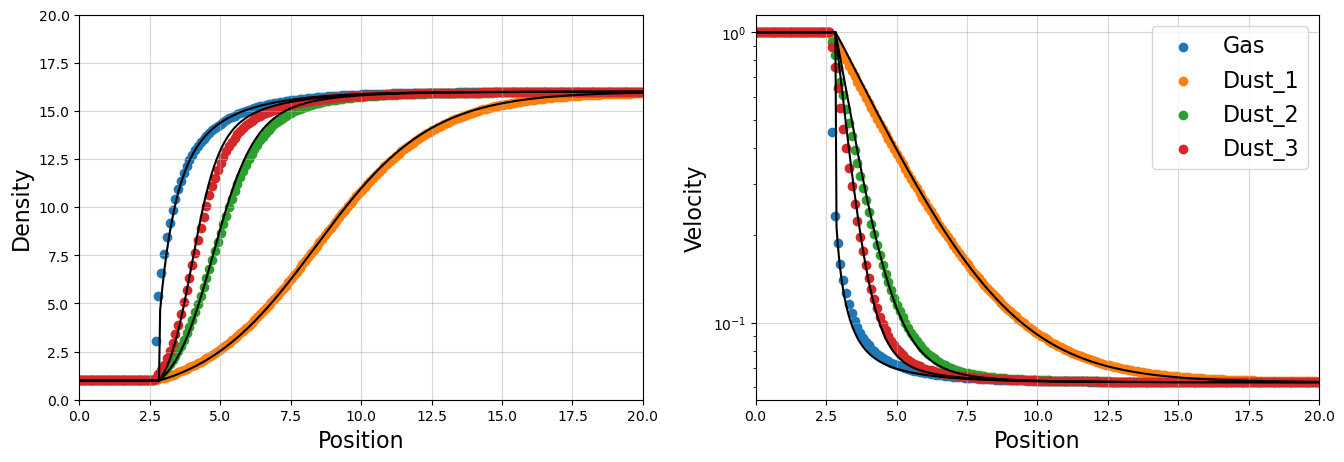

In [112]:
fig, axs = plt.subplots(1,2, figsize=(16,5))

#data = np.loadtxt("DUSTYSHOCK_multi/shock_B.inp")
data = np.loadtxt("DUSTYSHOCK/output_B/DHDHD/50.txt")
x = np.linspace(0,40,400)
axs[0].scatter(x, data[:,0])
axs[0].scatter(x, data[:,3])
axs[0].scatter(x, data[:,5])
axs[0].scatter(x, data[:,7])

axs[1].scatter(x, data[:,1] / 2, label='Gas')
axs[1].scatter(x, data[:,4] / 2, label='Dust_1')
axs[1].scatter(x, data[:,6] / 2, label='Dust_2')
axs[1].scatter(x, data[:,8] / 2, label='Dust_3')


data = np.loadtxt("DUSTYSHOCK/steady_state.txt")
data[:,0] -= 0.15
axs[0].plot(data[:,0], data[:,1], color='black')
axs[0].plot(data[:,0], data[:,2], color='black')
axs[0].plot(data[:,0], data[:,3], color='black')
axs[0].plot(data[:,0], data[:,4], color='black')


axs[1].plot(data[:,0], data[:,5], color='black')
axs[1].plot(data[:,0], data[:,6], color='black')
axs[1].plot(data[:,0], data[:,7], color='black')
axs[1].plot(data[:,0], data[:,8], color='black')

axs[1].set_yscale('log')
axs[0].set_xlim(0,20)
axs[0].set_ylim(0,20)
axs[1].set_xlim(0,20)
axs[0].set_ylabel("Density", fontsize=16)
axs[1].set_ylabel("Velocity", fontsize=16)
axs[1].legend(fontsize=16)
for ax in axs:
    ax.grid(alpha=0.5)
    ax.set_xlabel("Position", fontsize=16)
#axs[0].set_xlim(2,4)
#axs[0].set_ylim(0,10)